In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torch import nn

# Lesson 44 - Prediction using the model

- To check the model's predictive power, we make predictions for `y_test` on `X_test`.
- When we pass data through our model, it's going to run it through the forward method

#### From the previous video

In [3]:
# Creating a linear regression model class

class LinearRegressionModel(nn.Module):
  # Creating constructor
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                            dtype = torch.float), # <- PyTorch loves float32 by default
                                            requires_grad = True) # by default is also true
    self.bias = nn.Parameter(torch.randn(1,
                                         dtype = torch.float), # <- PyTorch loves float32 by default
                                          requires_grad = True)

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula


torch.manual_seed(88) # we'll get the same initial values when using seed
model_0 = LinearRegressionModel() # calling the class

In [4]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5734])), ('bias', tensor([1.3148]))])

In [5]:
# CREATING DATA AND TRAIN TEST SPLIT

# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

## Making Predictions using `torch.inference_mode()`

- An ideal model would make exact predictions to `y_test`

In [7]:
with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred

tensor([[1.7735],
        [1.7850],
        [1.7965],
        [1.8079],
        [1.8194],
        [1.8309],
        [1.8423],
        [1.8538],
        [1.8653],
        [1.8767]])

In [14]:
# alternative method - not recommended

y_preds = model_0(X_test)
y_preds

tensor([[1.7735],
        [1.7850],
        [1.7965],
        [1.8079],
        [1.8194],
        [1.8309],
        [1.8423],
        [1.8538],
        [1.8653],
        [1.8767]], grad_fn=<AddBackward0>)

- Inference mode turns off gradient tracking - because we're not doing training
- disables useful things which are available during training - so faster
- earlier `inference_mode()` was `torch.no_grad():`

## Visualizing predictions

In [13]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))


plot_predictions(predictions=y_pred)

<Figure size 1000x700 with 0 Axes>

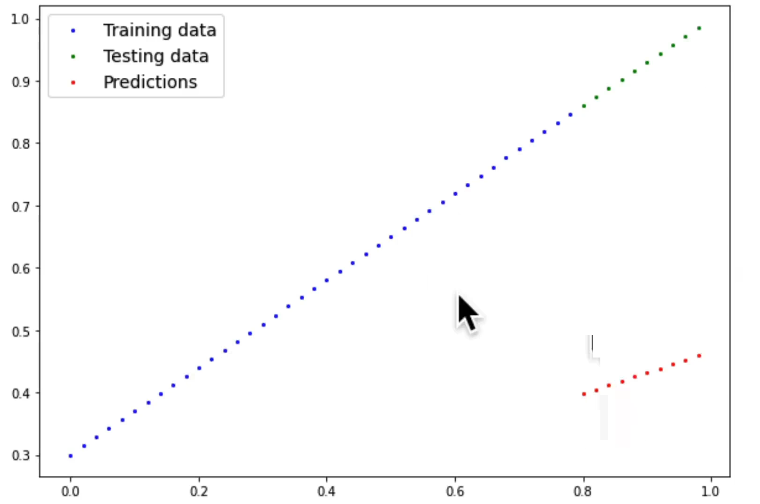

- This is a bad model
- It performed poorly because it was initialized with poor parameters
- An ideal model will replicate the known parameters 0 estimate the ideal parameters
- For this we do training of the model

---
# Lesson 45 - Training the model

- Training the model means to move from some **unknown/random** parameters to some **known** parameters.
- In other words, from a poor representation of the data to a better representation of the data.
- **Things we need to train the model:**
    1. Loss function
    2. Optimizer
- **For PyTorch specifically, we need:**
    1. Training loop
    2. Testing loop

## The loss function

- To measure how poor/wrong the model's predicitons are - we use a loss function.
- Loss function = Cost function = Critereon

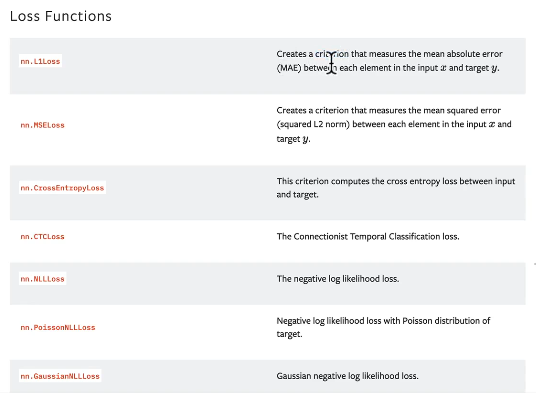

## Optimizer

- Takes into account the loss of the model (how wring it is) and adjusts the model's parameters (e.g. weight and bias) to improve the loss function
- It gives the model new parameters that minimize the loss function

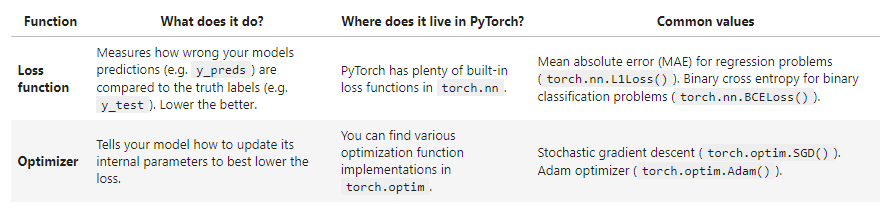

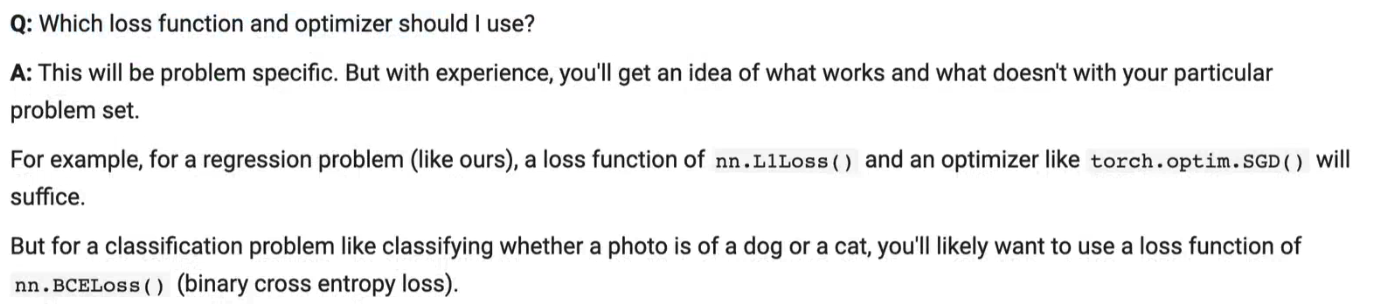

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.5734], requires_grad=True),
 Parameter containing:
 tensor([1.3148], requires_grad=True)]

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5734])), ('bias', tensor([1.3148]))])

# Lesson 46 - Calculating the loss

- `MAE` is the `L1Loss` in pytorch
- We need to minimize the loss/MAE

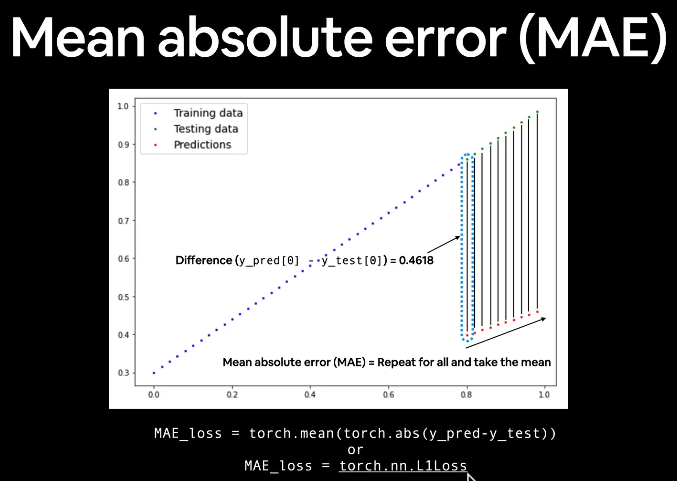

## Setting up the loss function and Optimizer

In [17]:
loss_fn = nn.L1Loss()

- `torch.optim` is  package implementing various optimization algorithms
- Like loss functions, there are many optimizers. `SGD` and `Adam` is the most popular.

In [19]:
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

- It starts by randomly adjusting these values, and once it has found the steps which have minimized the loss value its going to continue adjusting them in that direction
- `parameter` is a value which the model sets itself
- `hyperparameter` is a value which we set
- Higher the `lr` more it adjusts the laerning rate in 1 hit (larger change)